In [66]:
import seaborn as sns
import pdfplumber
from pandas import DataFrame
from keybert import KeyBERT
import matplotlib.pyplot as plt
import numpy as np

In [67]:
path = r'150723_Kenya_First NDC.pdf'
path = r'C:\Users\lehman_eri\Downloads\dppd_climate_change_mititgation.pdf'
text = []
with pdfplumber.open(path) as pdf:
    for page in pdf.pages:
        text.append(page.extract_text())
        
print(len(text))

8


In [70]:
text

['', '', '', '', '', '', '', '']

In [68]:
text_str = ' '.join([page for page in text])
text_500 = ' '.join([word for word in text_str.split()[:500]]) 

In [69]:
print(len(text_str),len(text_str.split()),len(text_500.split()))

7 0 0


In [13]:
kw_model = KeyBERT()

In [14]:
keywords = kw_model.extract_keywords(
            text_str,
            keyphrase_ngram_range=(1, 2),
            use_mmr=True,
            stop_words="english",
            top_n=10,
            diversity=0.5,
            )

In [15]:
keywords

[('kenya climate', 0.6419),
 ('presented nccap', 0.2602),
 ('sustainable development', 0.427),
 ('resources response', 0.3689),
 ('change secretariat', 0.2416),
 ('warming carbon', 0.4641),
 ('implementation climate', 0.4725),
 ('agriculture csa', 0.3411),
 ('national adaptation', 0.4079),
 ('ghgts_pc1990 2012', 0.21)]

In [36]:
df = (DataFrame(keywords, columns=["Keyword/Keyphrase", "Relevancy"])
                .sort_values(by="Relevancy", ascending=False)
                .reset_index(drop=True)   )
df.index += 1

In [37]:
# Add styling
cmGreen = sns.light_palette("green", as_cmap=True)
cmRed = sns.light_palette("red", as_cmap=True)
df = df.style.background_gradient(
    cmap=cmGreen,
    subset=[
        "Relevancy",
    ],
)

In [38]:

format_dictionary = {
    "Relevancy": "{:.1%}",
}

df = df.format(format_dictionary)
df

,Keyword/Keyphrase,Relevancy
1,change kenya,58.4%
2,impacts climate,47.5%
3,national adaptation,40.8%
4,natural resources,39.9%
5,change unfccc,31.4%
6,indc response,30.5%
7,stakeholder cross,30.0%
8,policies plans,27.6%
9,nccap 2013,23.8%
10,framework convention,17.2%


In [5]:
from transformers import pipeline 

finetuned_checkpoint = "peter2000/roberta-base-finetuned-osdg"
classifier = pipeline("text-classification", model=finetuned_checkpoint)


In [6]:
word_list = text_str.split()
len_word_list = len(word_list)
    

In [7]:
par_list = []
par_len = 130
for i in range(0,len_word_list // par_len):
    string_part = ' '.join(word_list[i*par_len:(i+1)*par_len])
    par_list.append(string_part)

In [8]:
par_list[5]

'mitigation activities. the form of finance, investment, technology development and transfer, and capacity \uf0b7 Expansion in geothermal, solar and wind energy production, building. other renewables and clean energy options. \uf0b7 Enhancement of Energy and resource efficiency across the different sectors. \uf0b7 Make progress towards achieving a tree cover of at least 10% of the land area of Kenya. \uf0b7 Clean energy technologies to reduce overreliance on wood fuels. \uf0b7 Low carbon and efficient transportation systems. \uf0b7 Climate smart agriculture (CSA) in line with the National CSA Framework. \uf0b7 Sustainable waste management systems. MINISTRY OF ENVIRONMENT AND NATURAL RESOURCES 2.1.1 Information to facilitate clarity, transparency and understanding Timeframe for The timeframe for implementation of the INDC is up to 2030. implementation Scope of gases Carbon dioxide (CO ), Methane (CH ),'

In [16]:
labels = classifier(par_list)
labels

[{'label': 'sdg_13', 'score': 0.9822573065757751},
 {'label': 'sdg_13', 'score': 0.9826704859733582},
 {'label': 'sdg_13', 'score': 0.9314947128295898},
 {'label': 'sdg_13', 'score': 0.9224072694778442},
 {'label': 'sdg_13', 'score': 0.9806581735610962},
 {'label': 'sdg_13', 'score': 0.9288563132286072},
 {'label': 'sdg_7', 'score': 0.3843623399734497},
 {'label': 'sdg_13', 'score': 0.5876168012619019},
 {'label': 'sdg_7', 'score': 0.5474262833595276},
 {'label': 'sdg_13', 'score': 0.9875952005386353},
 {'label': 'sdg_13', 'score': 0.979784369468689},
 {'label': 'sdg_13', 'score': 0.9798043966293335},
 {'label': 'sdg_13', 'score': 0.962694525718689},
 {'label': 'sdg_13', 'score': 0.9788507223129272},
 {'label': 'sdg_13', 'score': 0.9883235692977905},
 {'label': 'sdg_13', 'score': 0.9852647185325623},
 {'label': 'sdg_13', 'score': 0.9839308857917786}]

In [27]:
labels_= [(l['label'],l['score']) for l in labels]

In [28]:
labels_

[('sdg_13', 0.9822573065757751),
 ('sdg_13', 0.9826704859733582),
 ('sdg_13', 0.9314947128295898),
 ('sdg_13', 0.9224072694778442),
 ('sdg_13', 0.9806581735610962),
 ('sdg_13', 0.9288563132286072),
 ('sdg_7', 0.3843623399734497),
 ('sdg_13', 0.5876168012619019),
 ('sdg_7', 0.5474262833595276),
 ('sdg_13', 0.9875952005386353),
 ('sdg_13', 0.979784369468689),
 ('sdg_13', 0.9798043966293335),
 ('sdg_13', 0.962694525718689),
 ('sdg_13', 0.9788507223129272),
 ('sdg_13', 0.9883235692977905),
 ('sdg_13', 0.9852647185325623),
 ('sdg_13', 0.9839308857917786)]

In [40]:
df = DataFrame(labels_, columns=["SDG", "Relevancy"])
df['text'] = par_list      
df = df.sort_values(by="Relevancy", ascending=False).reset_index(drop=True)  
df.index += 1
#df =df[df['Relevancy']>.95]


In [41]:
df

,SDG,Relevancy,text
1,sdg_13,0.988324,"of its mitigation potential, dependent on the ..."
2,sdg_13,0.987595,places significant priority on adapting to the...
3,sdg_13,0.985265,the MTP. The adaptation actions are 1 GHG time...
4,sdg_13,0.983931,change functions by the National and County go...
5,sdg_13,0.982670,implementation of climate change actions in va...
6,sdg_13,0.982257,MINISTRY OF ENVIRONMENT AND NATURAL RESOURCES ...
7,sdg_13,0.980658,both domestic and international resources to a...
8,sdg_13,0.979804,of ecosystems to climate variability and chang...
9,sdg_13,0.979784,of current and future energy systems.  Scienc...
10,sdg_13,0.978851,contribution is also subject to limitations; w...


In [42]:
x = df['SDG'].value_counts()
x

sdg_13    15
sdg_7      2
Name: SDG, dtype: int64

In [50]:
list(x.index)

['sdg_13', 'sdg_7']

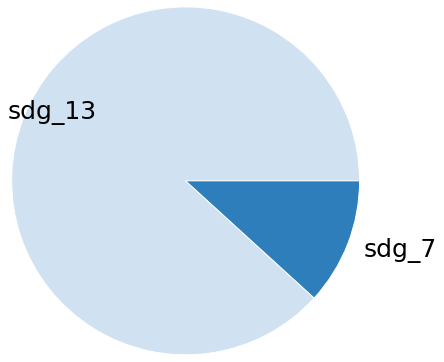

In [62]:
plt.rcParams['font.size'] = 25
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))
# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=2, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False,labels =list(x.index))


#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [65]:
# Add styling
cmGreen = sns.light_palette("green", as_cmap=True)
cmRed = sns.light_palette("red", as_cmap=True)
df = df.style.background_gradient(
    cmap=cmGreen,
    subset=[
        "Relevancy",
    ],
)
format_dictionary = {
    "Relevancy": "{:.1%}",
}

df = df.format(format_dictionary)
df

,SDG,Relevancy,text
1,sdg_13,98.8%,"of its mitigation potential, dependent on the level of support available. This will involve implementing the priority mitigation and adaptation actions in the NCCAP to achieve a low carbon climate resilient development in line with Vision 2030. This is the first time that Kenya has stated an intended contribution to global mitigation efforts. In addition, Kenya’s INDC represents her aspiration to increase the resilience to climate change by introducing a comprehensive programme for adaptation action across sectors in support of livelihoods, and economic well-being of the Kenyan people. This represents a high level of fairness and ambition in light of Kenya’s national circumstances. 4. Planning process Kenya’s planning process on mitigation and adaptation hinges on the NCCAP and the NAP. The two shall be reviewed every five years to inform"
2,sdg_13,98.8%,"places significant priority on adapting to the effects of climate change. 2.2.1 Programme of action for adaptation The priority adaptation actions are presented in the NCCAP and further Kenya will ensure enhanced resilience to climate change towards the attainment of elaborated in the NAP. The actions are based on risk and vulnerability assessments across Vision 2030 by mainstreaming climate change adaptation into the Medium Term the MTP sectors. Many of the actions have strong synergies with mitigation actions. Plans (MTPs) and implementing adaptation Kenya’s capacity to undertake strong actions. Any reasonable achievement of the adaptation goal will require financial, mitigation actions is dependent upon support for the implementation of these technology and capacity building support. adaptation actions.  MTP SECTOR  PRIORITY ADAPTATION ACTIONS  Energy  Increase the resilience"
3,sdg_13,98.5%,"the MTP. The adaptation actions are 1 GHG time series 1990-2012 per capita emissions for world countries http://edgar.jrc.ec.europa.eu/overview.php?v=GHGts_pc1990-2012 MINISTRY OF ENVIRONMENT AND NATURAL RESOURCES further amplified in the NAP. Mitigation and adaptation actions are implemented across the various sectors at both the national and county government levels. The Ministry of Environment and Natural Resources coordinates the country’s climate change affairs through the National Climate Change Secretariat (NCCS). The planning process also takes cognisance of the Climate Change Bill (2014) that proposes several institutional reforms to enhance coordination of climate change adaptation and mitigation. These include the establishment of:  A high level National Climate Change Council chaired by the President. The Council shall provide an overarching national climate change coordination mechanism and, among other roles, ensure the mainstreaming of climate"
4,sdg_13,98.4%,"change functions by the National and County governments, and approve and oversee the implementation of the NCCAP.  A Climate Change Directorate as the lead agency of the government on national climate change plans and actions to deliver operational coordination; and provide technical assistance on climate change actions and responses to County governments.  Kenya Climate Fund to be a financing mechanism for priority climate change actions and interventions approved by the Council. In addressing climate change issues, public entities are required to undertake public awareness and consultations, and ensure gender mainstreaming, in line with the Constitution and the Climate Change Bill (2014). 5. Means of implementation Kenya’s contribution will be implemented with both domestic and international support. It is estimated that over USD 40 billion is required for mitigation"
5,sdg_13,98.3%,"implementation of climate change actions in various areas such as afforestation and reforestation, geothermal and other clean energy development, energy efficiency, climate smart agriculture, and drought management. This document presents Kenya’s Intended Nationally Determined Contribution 

In [1]:
'''from pdfminer3.layout import LAParams, LTTextBox
from pdfminer3.pdfpage import PDFPage
from pdfminer3.pdfinterp import PDFResourceManager
from pdfminer3.pdfinterp import PDFPageInterpreter
from pdfminer3.converter import PDFPageAggregator
from pdfminer3.converter import TextConverter
import io

resource_manager = PDFResourceManager()
fake_file_handle = io.StringIO()
converter = TextConverter(resource_manager, fake_file_handle, laparams=LAParams())
page_interpreter = PDFPageInterpreter(resource_manager, converter)

with open('150723_Kenya_First NDC.pdf', 'rb') as fh:

    for page in PDFPage.get_pages(fh,
                                  caching=True,
                                  check_extractable=True):
        page_interpreter.process_page(page)

    text = fake_file_handle.getvalue()

# close open handles
converter.close()
fake_file_handle.close()

print(text)'''

"from pdfminer3.layout import LAParams, LTTextBox\nfrom pdfminer3.pdfpage import PDFPage\nfrom pdfminer3.pdfinterp import PDFResourceManager\nfrom pdfminer3.pdfinterp import PDFPageInterpreter\nfrom pdfminer3.converter import PDFPageAggregator\nfrom pdfminer3.converter import TextConverter\nimport io\n\nresource_manager = PDFResourceManager()\nfake_file_handle = io.StringIO()\nconverter = TextConverter(resource_manager, fake_file_handle, laparams=LAParams())\npage_interpreter = PDFPageInterpreter(resource_manager, converter)\n\nwith open('150723_Kenya_First NDC.pdf', 'rb') as fh:\n\n    for page in PDFPage.get_pages(fh,\n                                  caching=True,\n                                  check_extractable=True):\n        page_interpreter.process_page(page)\n\n    text = fake_file_handle.getvalue()\n\n# close open handles\nconverter.close()\nfake_file_handle.close()\n\nprint(text)"

In [2]:
#convert_pdf_to_txt('150723_Kenya_First NDC.pdf')